In [2]:
# !pip install ultralytics -q

In [3]:
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 18.4MB/s]


In [6]:
img_path = '/workspace/datasets/coco_minitrain_25k/images/train2017/000000231538.jpg'
image = cv2.imread(img_path)
results = model(image)[0]


0: 640x480 5 persons, 1 backpack, 3 suitcases, 124.6ms
Speed: 4.0ms preprocess, 124.6ms inference, 97.9ms postprocess per image at shape (1, 3, 640, 480)


In [7]:
import supervision as sv
detections = sv.Detections.from_ultralytics(results)

In [8]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    model.model.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

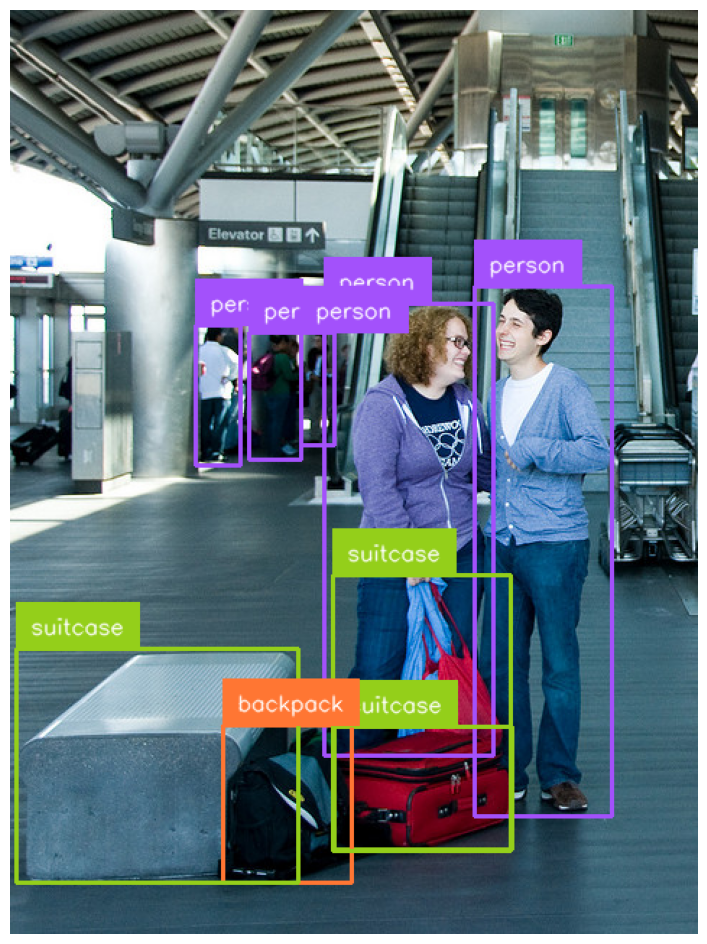

In [9]:
sv.plot_image(annotated_image)
